Import Necessary Libraries

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

Load The Dataset

In [37]:
df = pd.read_csv('Dataset .csv')
df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Data Preprocessing Techniques:
  1. Drop the unwanted Columns

In [39]:
df = df.drop('Restaurant ID', axis=1)
df = df.drop('Restaurant Name', axis=1)
df = df.drop('Country Code', axis=1)
df = df.drop('City', axis=1)
df = df.drop('Address', axis=1)
df = df.drop('Locality', axis=1)
df = df.drop('Locality Verbose', axis=1)
df = df.drop('Longitude', axis=1)
df = df.drop('Latitude', axis=1)
df = df.drop('Cuisines', axis=1)
df = df.drop('Currency', axis=1)
df

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,1200,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,4000,Yes,No,No,No,4,4.4,Green,Very Good,270
3,1500,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,1500,Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...
9546,80,No,No,No,No,3,4.1,Green,Very Good,788
9547,105,No,No,No,No,3,4.2,Green,Very Good,1034
9548,170,No,No,No,No,4,3.7,Yellow,Good,661
9549,120,No,No,No,No,4,4.0,Green,Very Good,901


Checking How many Rows and Columns after droping some columns 

In [40]:
df.shape

(9551, 10)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  9551 non-null   int64  
 1   Has Table booking     9551 non-null   object 
 2   Has Online delivery   9551 non-null   object 
 3   Is delivering now     9551 non-null   object 
 4   Switch to order menu  9551 non-null   object 
 5   Price range           9551 non-null   int64  
 6   Aggregate rating      9551 non-null   float64
 7   Rating color          9551 non-null   object 
 8   Rating text           9551 non-null   object 
 9   Votes                 9551 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 746.3+ KB


2.Handling the Missing Values

In [42]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


3.Check for Duplicate Values

In [43]:
print("duplicate value is :",df.duplicated().sum())
df.dropna(inplace=True)

duplicate value is : 2871


Encoding Categorical variables by using LabelEncoder

In [44]:
label_encoder = LabelEncoder()
df['Has Table booking'] = label_encoder.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = label_encoder.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = label_encoder.fit_transform(df['Is delivering now'])
df['Switch to order menu'] = label_encoder.fit_transform(df['Switch to order menu'])
df['Rating color'] = label_encoder.fit_transform(df['Rating color'])
df['Rating text'] = label_encoder.fit_transform(df['Rating text'])

In [45]:
print(df)

      Average Cost for two  Has Table booking  Has Online delivery  \
0                     1100                  1                    0   
1                     1200                  1                    0   
2                     4000                  1                    0   
3                     1500                  0                    0   
4                     1500                  1                    0   
...                    ...                ...                  ...   
9546                    80                  0                    0   
9547                   105                  0                    0   
9548                   170                  0                    0   
9549                   120                  0                    0   
9550                    55                  0                    0   

      Is delivering now  Switch to order menu  Price range  Aggregate rating  \
0                     0                     0            3               4.8   

Choosing the Target and Features 

In [46]:
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

Spliting the dataset into Train and Test data

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Applying Linear Regression Algorithm

In [48]:
import warnings
warnings.filterwarnings("ignore", category =UserWarning)  #to ignore user warnings
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = linear_reg.predict(X_test)

Calculate MSE and R-squared values

In [50]:
print("Mean Squared Error (MSE):",metrics.mean_squared_error(y_test,y_pred))
print("R-squared (R2) Error:",metrics.r2_score(y_test,y_pred))

Mean Squared Error (MSE): 1.4078364823112826
R-squared (R2) Error: 0.3814722896376511


Finding coefficient and intercept

In [51]:
print("coefficient value is :",linear_reg.coef_)
print("intercept value is :",linear_reg.intercept_)

coefficient value is : [ 1.13554696e-06 -2.17859086e-01  5.98189868e-01 -2.42532705e-01
  5.55111512e-17  6.58540840e-01 -2.52687815e-01 -2.08406209e-01
  6.97199218e-04]
intercept value is : 2.3544432705275944


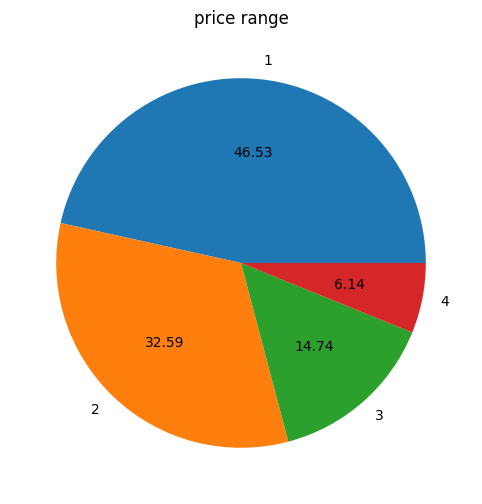

In [52]:
plt.figure(figsize=(8,6))
df['Price range'].value_counts().plot(kind='pie', autopct = '%.2f')
plt.title('price range')
plt.ylabel('')
plt.show()

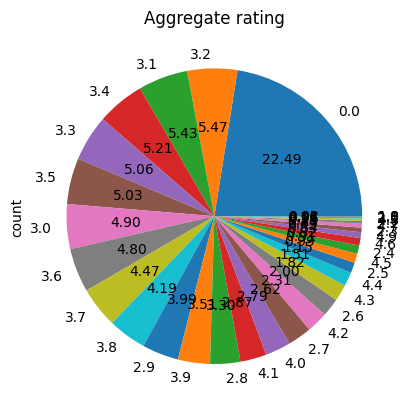

In [53]:
df['Aggregate rating'].value_counts().plot(kind='pie', autopct = '%.2f')
plt.title('Aggregate rating')
plt.show()

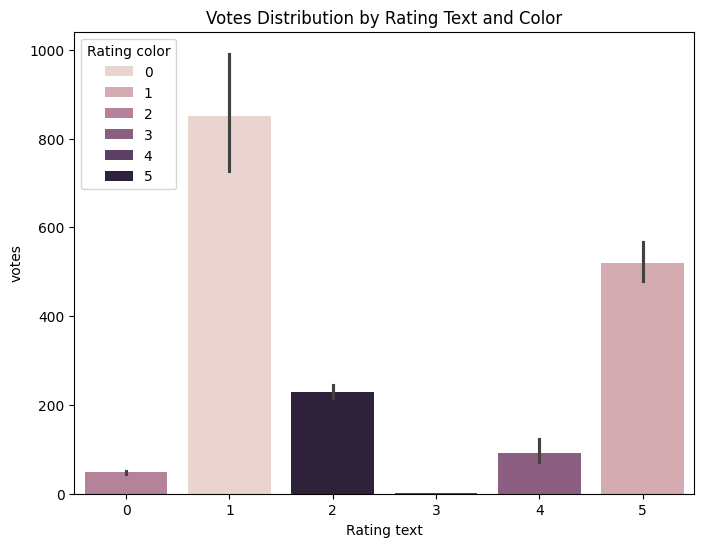

In [54]:
plt.figure(figsize=(8,6))
sns.barplot(x=df["Rating text"],y=df["Votes"],hue =df["Rating color"])
plt.xlabel('Rating text')
plt.ylabel('votes')
plt.title('Votes Distribution by Rating Text and Color')
plt.legend(loc='upper left',title='Rating color')
plt.show()

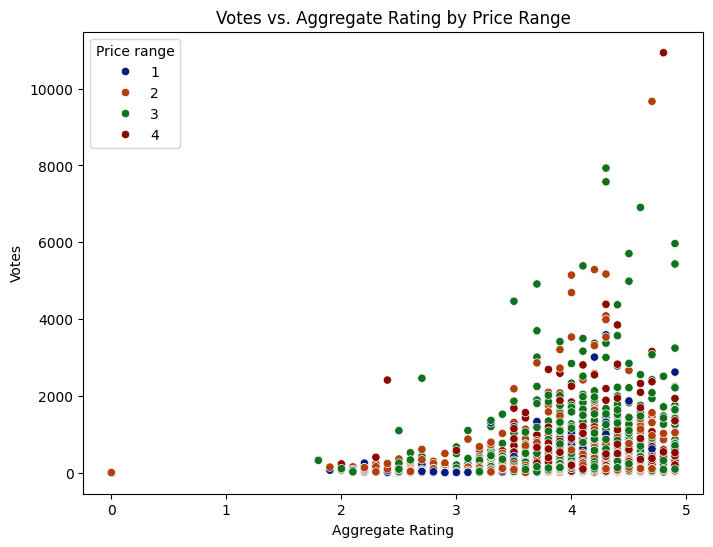

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Aggregate rating"], y=df["Votes"], hue=df["Price range"],palette="dark")
plt.title('Votes vs. Aggregate Rating by Price Range')
plt.xlabel('Aggregate Rating')
plt.ylabel('Votes')
plt.show()

Building the Decision Tree Regressor

In [56]:
DTree=DecisionTreeRegressor(min_samples_leaf=0.0001)
DTree.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=0.0001)

In [57]:
y_predict=DTree.predict(X_test)

In [58]:
mse = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error (RMSE): {mse:.2f}")
r2 = r2_score(y_test, y_predict)
print(f"R-squared (R2) Error: {r2:.2f}")

Mean Squared Error (RMSE): 0.05
R-squared (R2) Error: 0.98


In [59]:
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': linear_reg.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=True)
print(coefficients)

                Feature   Coefficient
6          Rating color -2.526878e-01
3     Is delivering now -2.425327e-01
1     Has Table booking -2.178591e-01
7           Rating text -2.084062e-01
4  Switch to order menu  5.551115e-17
0  Average Cost for two  1.135547e-06
8                 Votes  6.971992e-04
2   Has Online delivery  5.981899e-01
5           Price range  6.585408e-01
